In [1]:
# import....
import tensorflow as tf
from keras.models import load_model
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import keras
from keras import optimizers  


In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]


In [3]:
# Paths...
train_path = 'Datasets/Train' # Trian path
valid_path = 'Datasets/Test'  # Test path


In [4]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [6]:
# useful for getting number of classes
folders = glob('Datasets/Train/*')

In [7]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [8]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [9]:
# view the structure of the model
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [10]:
 #tell the model what cost and optimization method to use
adam = optimizers.Adam()

model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

In [11]:
# tell the model what cost and optimization method to use
#model.compile(optimizer="adam",
              #loss="categorical_crossentropy",
             # metrics=[keras.metrics.Precision(), keras.metrics.Recall(), keras.metrics.AUC(), 'accuracy'])

In [12]:
from keras.preprocessing.image import ImageDataGenerator

In [13]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [14]:
test_datagen = ImageDataGenerator(rescale = 1./255)                                
                                  

In [15]:
training_set = train_datagen.flow_from_directory('Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 37920 images belonging to 43 classes.


In [16]:
test_set = test_datagen.flow_from_directory('Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1614 images belonging to 43 classes.


In [17]:
# fit the model
r=model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set))

Epoch 1/10
1185/1185 [==============================] - 12873s 11s/step - loss: 1.2328 - accuracy: 0.6602 - val_loss: 1.3098 - val_accuracy: 0.6939
Epoch 2/10
1185/1185 [==============================] - 13276s 11s/step - loss: 0.6113 - accuracy: 0.8161 - val_loss: 1.3001 - val_accuracy: 0.7515
Epoch 3/10
1185/1185 [==============================] - 13633s 12s/step - loss: 0.4959 - accuracy: 0.8499 - val_loss: 1.0466 - val_accuracy: 0.7590
Epoch 4/10
1185/1185 [==============================] - 13767s 12s/step - loss: 0.4077 - accuracy: 0.8746 - val_loss: 1.2041 - val_accuracy: 0.7664
Epoch 5/10
1185/1185 [==============================] - 12045s 10s/step - loss: 0.3832 - accuracy: 0.8810 - val_loss: 1.5440 - val_accuracy: 0.7751
Epoch 6/10
1185/1185 [==============================] - 11910s 10s/step - loss: 0.3566 - accuracy: 0.8940 - val_loss: 1.5451 - val_accuracy: 0.7825
Epoch 7/10
1185/1185 [==============================] - 13583s 11s/step - loss: 0.3159 - accuracy: 0.9038 - val_

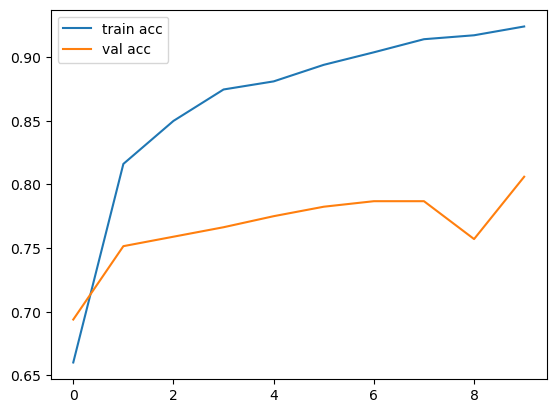

<Figure size 640x480 with 0 Axes>

In [21]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


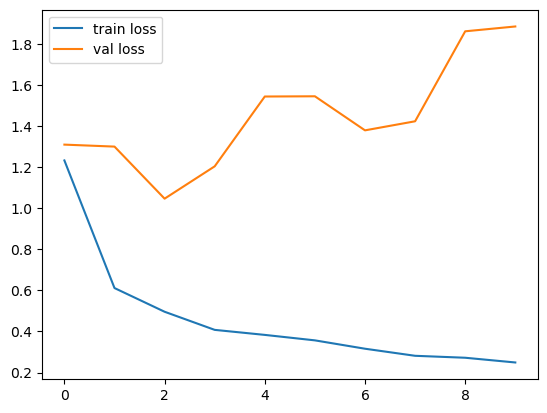

<Figure size 640x480 with 0 Axes>

In [22]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

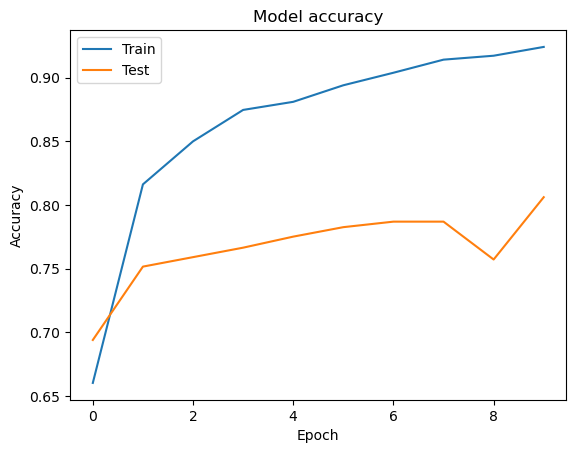

In [25]:




# Plot training & validation accuracy values
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()